<a href="https://colab.research.google.com/github/jangbigom91/Bigdata/blob/master/Tensorflow_Fashion_MNIST_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
# Fashion MNIST 데이터셋은 텐서플로우에서 쉽게 로딩 가능

# load_data() 함수로 넘파이 배열을 반환
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터셋에 클래스 이름이 없으므로, 나중에 이미지를 출력하기 위해 별도의 변수를 생성

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Traning set 확인 (60000개 이미지, 28x28 픽셀)

train_images

In [ ]:
# Training set의 각 Label은 0~9 정수

train_labels

In [ ]:
# Test set 확인 (10000개 이미지, 28x28 픽셀)

test_images.shape

In [ ]:
# Test set의 각 Label은 0~9 정수

test_labels

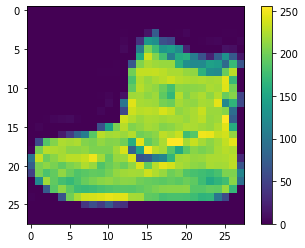

In [ ]:
# 픽셀 값의 범위가 0~255 라는 것을 확인

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Training/Test set 모두 255로 나누어, 범위값을 0~1 사이로 표준화

train_images = train_images / 255.0

test_images = test_images / 255.0

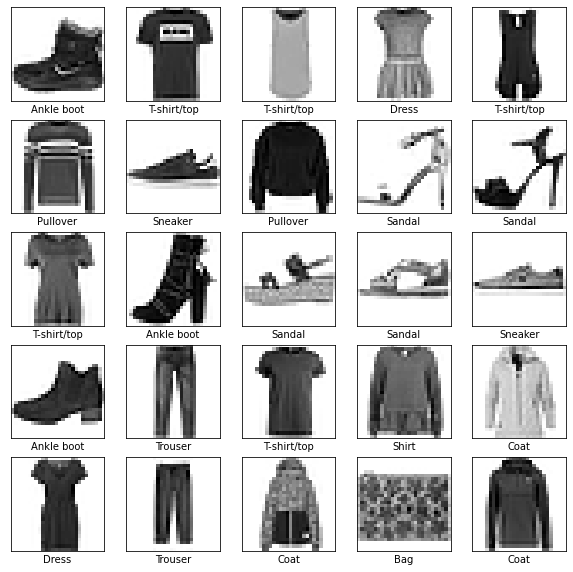

In [ ]:
# 데이터 포맷 확인을 위해, Training set에서 처음 25개 이미지 및 클래스를 출력

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# keras.layers.Flatten로 첫번째 층 생성 후, 두 개의 keras.layers.Dense 층에 연결

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 훈련에 필요한 설정을 컴파일 과정에서 추가

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.fit 함수로 모델이 학습되면서 손실과 정확도 지표 출력
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4998 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8910


In [ ]:
# model.evaludate 함수로 Test set 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3546 - accuracy: 0.8703

테스트 정확도: 0.8702999949455261


In [ ]:
# 첫번째 예측으로 10개의 옷 품목에 상응하는 모델의 신뢰도가 배열로 보여짐
predictions = model.predict(test_images)

predictions[0]

array([5.0860763e-06, 6.4239543e-08, 9.9000744e-08, 2.5329682e-06,
       2.6712263e-07, 3.9309016e-03, 1.6415183e-06, 1.2329473e-02,
       1.6999018e-05, 9.8371291e-01], dtype=float32)

In [ ]:
# 가장 높은 신뢰도를 가진 레이블 확인
np.argmax(predictions[0])

9

In [ ]:
# 이미지 클래스를 예측하여 그래프/신뢰도를 출력하는 함수 정의
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

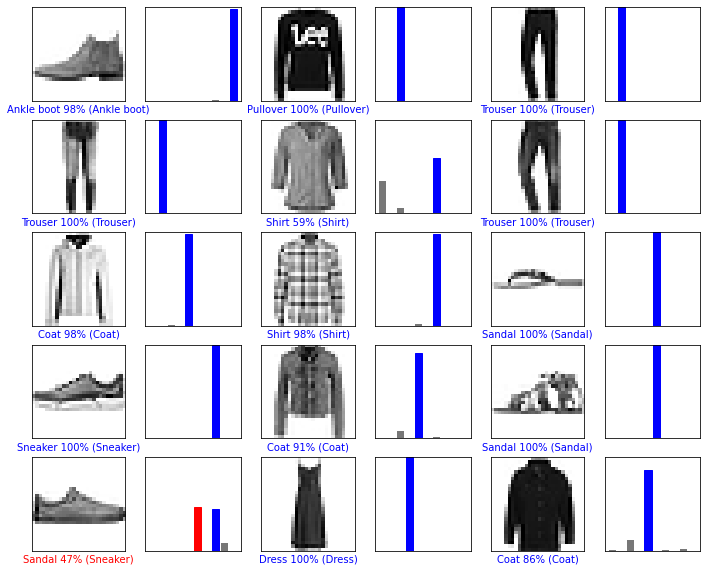

In [ ]:
# 올바른 예측은 파란색, 잘못 예측은 빨강색

# 숫자는 예측 레이블의 신뢰도 퍼센트
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

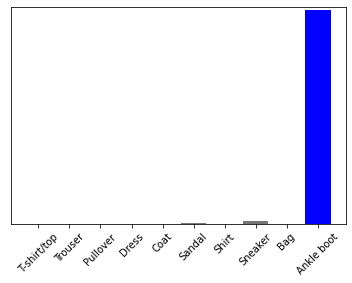

In [ ]:
# 한 개의 이미지 예측을 테스트하기 위해, Test set에서 이미지 선택
img = test_images[0]

# tf.keras 모델은 한 개의 이미지만 사용할 때에도 배치 추가
img = (np.expand_dims(img,0))

# 입력된 이미지에 대한 예측 실행
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
# model.predict 함수는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지 예측을 선택
np.argmax(predictions_single[0])

9